In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import heating as heat
import cooling as cool
import cgs as cgs
from initial_conditions import ic_list as icl

In [5]:
LT_names = []
LT_dict  = {}
for ic in icl.ic_object_dict.keys():
    if ic.startswith('LT_n'):
        LT_names.append(ic)
        LT_dict[ic] = icl.ic_object_dict[ic]

In [6]:
# should toss SF radius into initial conditions for LT models
# and the UV heating flux !!!
r_SF = 170.0 * cgs.pc # Ryan-Weber... stellar radiuys from plummer model... 120 pc blue star overdensity
pe_heat = 0.5E-28

In [7]:
r = np.linspace(0.0, LT_dict['LT_n075_v2_nh3'].ic['r_HI'], 300.0)

for name in LT_names:
    LT_dict[name].find_density_profile(r)

In [9]:
heating_rate = {}
cooling_rate = {}
difference   = {}

LTE_poly = {}
LTE_heating = {}
for name in LT_names:
    n = LT_dict[name].rho / (LT_dict[name].ic['mu_dwarf'] * cgs.mp)
    T = LT_dict[name].ic['T_dwarf']
    
    heating_rate[name] = heat.lower_bound_heating(r, n, T, r_uv = r_SF, pe_heat = pe_heat)
    cooling_rate[name] = cool.radloss(n, T)
    difference[name]   = heating_rate[name] - cooling_rate[name] * n
    
    LTE_poly[name], LTE_heating[name] = heat.LTE_heating_fit(r, n, T,


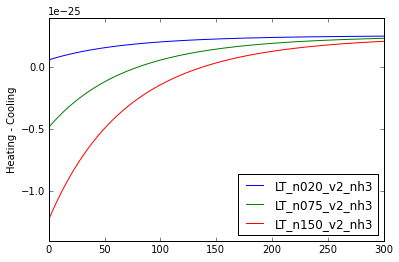

In [16]:
for name in ['LT_n020_v2_nh3', 'LT_n075_v2_nh3', 'LT_n150_v2_nh3']:
    plt.plot(r/cgs.pc, difference[name], label=name)
    
plt.legend(loc='best')
plt.ylabel("Heating - Cooling")